In [1]:
import matplotlib.pyplot as plt
import numpy as np

from kalman import kalman_predict, kalman_update
from linear_dynamical_system import LinearDynamicalSystem

# Example: Point on 1d Line

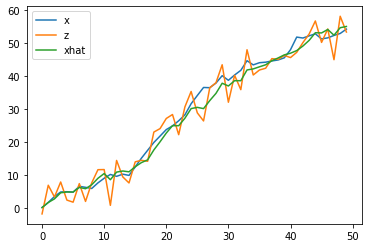

In [3]:
F = np.array([[1]])
H = np.array([[1]])
Q = np.array([[1]])
R = np.array([[10]])

lds = LinearDynamicalSystem(F, H, Q, R)

states = []
observations = []
estimates = []

obs = lds.observe()
u = np.array([[1]])

x_hat = np.zeros((1, 1))
P = np.zeros((1, 1))

for i in range(50):
    states.append(lds.x.flatten())
    observations.append(obs.flatten())
    estimates.append(x_hat.flatten())

    x_hat, P = kalman_predict(x_hat, P, lds.F, lds.Q, lds.B, u)
    lds.update(u)

    obs = lds.observe()
    x_hat, P = kalman_update(x_hat, P, lds.F, lds.H, lds.Q, lds.R, obs)

fig, ax = plt.subplots()
ax.plot(np.arange(len(states)), states, label="x")
ax.plot(np.arange(len(observations)), observations, label="z")
ax.plot(np.arange(len(estimates)), estimates, label="xhat")
ax.legend()
plt.show()

# Example: Truck on Rails (from Wikipedia)
https://en.wikipedia.org/wiki/Kalman_filter#Example_application,_technical

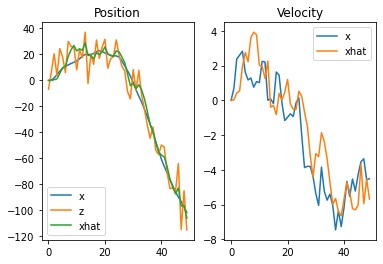

In [4]:
accel_std = 1
obs_noise_std = 10
dt = 1

F = np.array([[1, dt], [0, 1]])
G = np.array([[0.5 * (dt**2)], [dt]])
Q = G @ G.T * (accel_std**2)
H = np.array([[1, 0]])
R = np.array([[obs_noise_std**2]])

lds = LinearDynamicalSystem(F, H, Q, R)

states = []
observations = []
estimates = []

obs = lds.observe()

x_hat = np.array([[0], [0]])
P = np.zeros(2)

for i in range(50):
    states.append(lds.x.flatten())
    observations.append(obs.flatten())
    estimates.append(x_hat.flatten())

    x_hat, P = kalman_predict(x_hat, P, lds.F, lds.Q)
    lds.update()

    obs = lds.observe()
    x_hat, P = kalman_update(x_hat, P, lds.F, lds.H, lds.Q, lds.R, obs)

fig, axarr = plt.subplots(1, 2)
axarr[0].plot(np.arange(len(states)), np.array(states)[:, 0], label="x")
axarr[0].plot(np.arange(len(observations)), np.array(observations)[:, 0], label="z")
axarr[0].plot(np.arange(len(estimates)), np.array(estimates)[:, 0], label="xhat")
axarr[0].legend()
axarr[0].set_title("Position")

axarr[1].plot(np.arange(len(states)), np.array(states)[:, 1], label="x")
axarr[1].plot(np.arange(len(estimates)), np.array(estimates)[:, 1], label="xhat")
axarr[1].legend()
axarr[1].set_title("Velocity")
plt.show()